# **Homework 10 - LSTM**
# KDD Tuesdays 12:30 PM - 2:45 PM
## Jake Brulato

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, LSTM
from sklearn.preprocessing import MinMaxScaler

2024-04-01 13:20:19.904387: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
Google_train = pd.read_csv('Google_Stock_Price_Train.csv')
Google_test = pd.read_csv('Google_Stock_Price_Test.csv')
Google_train.head(5)


,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
Google_train.tail(5)

,Date,Open,High,Low,Close,Volume
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"
1257,12/30/2016,782.75,782.78,770.41,771.82,"1,770,000"


In [4]:
Google_train.shape
Google_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [5]:
training_set = Google_train.iloc[:, 4:5].values #close price
training_set = training_set.astype(str).reshape(-1)
training_set = np.array([float(x.replace(',', '')) for x in training_set])
training_set





array([663.59, 666.45, 657.21, ..., 785.05, 782.79, 771.82])

In [6]:
# # Define the number of consecutive days
n_days = 45

# # Split the dataset into training and test sets
train_data = Google_train.iloc[:, 4:5].values #close price
train_data = train_data.astype(str).reshape(-1)
train_data = np.array([float(x.replace(',', '')) for x in train_data])

test_data = Google_test.iloc[:, 4:5].values #close price
test_data = test_data.astype(str).reshape(-1)
test_data = np.array([float(x.replace(',', '')) for x in test_data])

# # Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
train_data = scaler.fit_transform(train_data.reshape(-1, 1))
test_data = scaler.transform(test_data.reshape(-1, 1))




In [7]:
X_train = []
y_train = []
for i in range(n_days, len(train_data)):
    X_train.append(train_data[i-n_days:i, 0])
    y_train.append(train_data[i, 0])
X_train = np.array(X_train)
y_train = np.array(y_train)

In [8]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape


(1213, 45, 1)

In [16]:
model = Sequential()
model.add(LSTM(units=30, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.1))
model.add(LSTM(units=30, return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(units=30))
model.add(Dropout(0.1))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=100, verbose=1)


Epoch 1/100
38/38 [==============================] - 8s 38ms/step - loss: 0.0251
Epoch 2/100
38/38 [==============================] - 1s 35ms/step - loss: 0.0082
Epoch 3/100
38/38 [==============================] - 2s 40ms/step - loss: 0.0070
Epoch 4/100
38/38 [==============================] - 1s 37ms/step - loss: 0.0071
Epoch 5/100
38/38 [==============================] - 1s 36ms/step - loss: 0.0059
Epoch 6/100
38/38 [==============================] - 1s 37ms/step - loss: 0.0056
Epoch 7/100
38/38 [==============================] - 1s 36ms/step - loss: 0.0048
Epoch 8/100
38/38 [==============================] - 1s 37ms/step - loss: 0.0046
Epoch 9/100
38/38 [==============================] - 1s 38ms/step - loss: 0.0044
Epoch 10/100
38/38 [==============================] - 1s 33ms/step - loss: 0.0039
Epoch 11/100
38/38 [==============================] - 1s 33ms/step - loss: 0.0043
Epoch 12/100
38/38 [==============================] - 1s 34ms/step - loss: 0.0040
Epoch 13/100
38/38 [=====

In [17]:
dataset_total = pd.concat((Google_train['Close'], Google_test['Close']), axis=0)
inputs = dataset_total[len(dataset_total) - len(Google_test) - n_days:].values

inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(n_days, n_days + len(Google_test)):
    X_test.append(inputs[i-n_days:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [18]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

1/1 [==============================] - 1s 1s/step


In [19]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

print(predicted_stock_price)


1/1 [==============================] - 0s 71ms/step
[[777.37616]
 [778.11255]
 [781.5641 ]
 [787.2004 ]
 [796.18713]
 [802.859  ]
 [804.8946 ]
 [805.65344]
 [805.0448 ]
 [804.8289 ]
 [803.52466]
 [803.0507 ]
 [801.55396]
 [801.59143]
 [808.3228 ]
 [816.6125 ]
 [826.87244]
 [831.8143 ]
 [828.5625 ]
 [814.6653 ]]


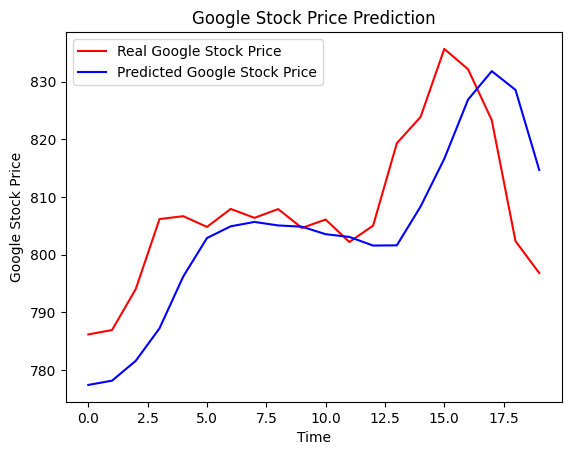

In [20]:
plt.plot(Google_test['Close'], color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()